In [1]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import datetime

sys.path.append("..")

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.2.2


Evaluating HS-SampleWithReplacement.................................................................................................... 3.5 seconds
Regret: 314.80 +/- 45.47 (median: 50.00, max: 2162.00, min: -56.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 98.4 seconds
Regret: 210.59 +/- 35.58 (median: 22.50, max: 1661.00, min: -17.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 95.3 seconds
Regret: 170.49 +/- 29.66 (median: 24.50, max: 1661.00, min: -3.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 96.9 seconds
Regret: 124.05 +/- 23.33 (median: 25.00, max: 1293.00, min: -16.00)
Evaluating HS-SampleWithReplacement...................................................................................................

Evaluating HS-SampleWithReplacement.................................................................................................... 98.1 seconds
Regret: 32.68 +/- 6.91 (median: 16.54, max: 471.46, min: -2.42)
Evaluating HS-SampleWithReplacement.................................................................................................... 97.8 seconds
Regret: 38.08 +/- 7.02 (median: 18.39, max: 443.77, min: -7.55)
Evaluating HS-SampleWithReplacement.................................................................................................... 101.8 seconds
Regret: 27.26 +/- 3.40 (median: 18.96, max: 287.97, min: 11.36)
Evaluating HS-SampleWithReplacement.................................................................................................... 98.8 seconds
Regret: 26.56 +/- 2.09 (median: 21.14, max: 156.96, min: 5.47)
Evaluating HS-SampleWithReplacement.................................................................................................... 99.0 seconds

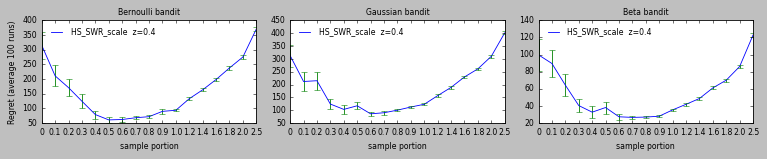

In [4]:
import datetime

sample_portions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                   0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5]
sample_portions_labels = [str(x) for x in sample_portions] 
init_var = 0.4

# sample_portions = [0, 0.1, 0.2, 0.5, 0.7, 1.0]
# sample_portions_labels = ['0', '0.1', '0.2', 
#                           '0.5', '0.7', '1.0'] 

x_axis = np.arange(len(sample_portions))
num_runs = 100
n = 10000
K = 10

plt.figure(figsize=(9.6, 2))
algs = ['HS_SWR_scale']
colors = {'HS_SWR_scale':'red'}

for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    elif fig == 1:
      env.append(GaussBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 3, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for sample_portion in sample_portions:
        regret, _ = evaluate_parallel(alg_class, 
            {"sample_portion": sample_portion, "z": init_var}, env, n, num_process=13)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/np.sqrt(num_runs))

    plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), 
             label=alg+'  z='+str(init_var))
    plt.errorbar(x_axis, regret_means, regret_vars, fmt="none")
    plt.xticks(x_axis, sample_portions_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  elif fig == 1:
    plt.title("Gaussian bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("sample portion")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))

  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("../exp_results/HS_SWR_scale_asnoise_init_vs_SamplePortion_{}_{}_{}_{}.jpeg" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
    plt.savefig(f, format="jpeg", bbox_inches=0)
#   plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating HS-SampleWithReplacement.................................................................................................... 96.7 seconds
Regret: 106.78 +/- 6.85 (median: 93.50, max: 547.00, min: -5.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 96.6 seconds
Regret: 92.68 +/- 8.01 (median: 71.50, max: 486.00, min: 3.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 94.3 seconds
Regret: 85.23 +/- 7.35 (median: 65.00, max: 557.00, min: -21.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 93.7 seconds
Regret: 77.93 +/- 5.79 (median: 66.50, max: 476.00, min: -59.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 97.6 secon

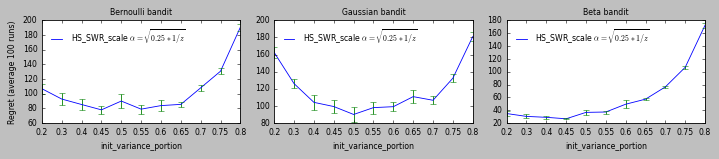

In [7]:
import datetime

init_vars = [0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, \
             0.65, 0.7, 0.75, 0.8]
init_var_labels = [str(x) for x in init_vars] 
sample_portion = 0.4

x_axis = np.arange(len(init_vars))
num_runs = 100
n = 10000
K = 10

plt.figure(figsize=(9, 2))
algs = ['HS_SWR_scale']
colors = {'HS_SWR_scale':'red'}

for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    elif fig == 1:
      env.append(GaussBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 3, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for init_var in init_vars:
        sample_portion = np.sqrt(1/init_var * 0.25)
        regret, _ = evaluate_parallel(alg_class, 
            {"sample_portion": sample_portion, "z": init_var}, env, n, num_process=13)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/np.sqrt(num_runs))

    plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), 
             label=alg+r' $\alpha=\sqrt{0.25*1/z}$')
    plt.errorbar(x_axis, regret_means, regret_vars, fmt="none")
    plt.xticks(x_axis, init_var_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  elif fig == 1:
    plt.title("Gaussian bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("init_variance_portion")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))

  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("../exp_results/HS_SWR_scale_asnoise_vs_initVar_{}_{}_{}_{}.jpeg" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
    plt.savefig(f, format="jpeg", bbox_inches=0)
plt.show()

Evaluating PHE.................................................................................................... 6.7 seconds
Regret: 518.62 +/- 73.64 (median: 242.00, max: 3857.00, min: 1.00)
Evaluating PHE.................................................................................................... 6.0 seconds
Regret: 88.52 +/- 13.19 (median: 27.00, max: 661.00, min: -10.00)
Evaluating PHE.................................................................................................... 6.0 seconds
Regret: 71.61 +/- 7.56 (median: 38.00, max: 364.00, min: 5.00)
Evaluating PHE.................................................................................................... 6.0 seconds
Regret: 62.92 +/- 4.43 (median: 45.50, max: 248.00, min: 3.00)
Evaluating PHE.................................................................................................... 5.9 seconds
Regret: 74.13 +/- 5.27 (median: 59.00, max: 357.00, min: 16.00)
Evaluating PHE............................

Evaluating PHE.................................................................................................... 7.3 seconds
Regret: 91.55 +/- 1.95 (median: 90.45, max: 149.70, min: 53.12)
Evaluating PHE.................................................................................................... 7.5 seconds
Regret: 100.79 +/- 2.08 (median: 101.63, max: 152.20, min: 55.24)
Evaluating PHE.................................................................................................... 7.6 seconds
Regret: 108.35 +/- 2.07 (median: 110.05, max: 149.42, min: 63.54)
Evaluating PHE.................................................................................................... 7.3 seconds
Regret: 117.10 +/- 2.26 (median: 117.32, max: 164.40, min: 69.55)
Evaluating PHE.................................................................................................... 7.4 seconds
Regret: 132.99 +/- 2.45 (median: 132.95, max: 181.50, min: 81.12)
Evaluating PHE.......................

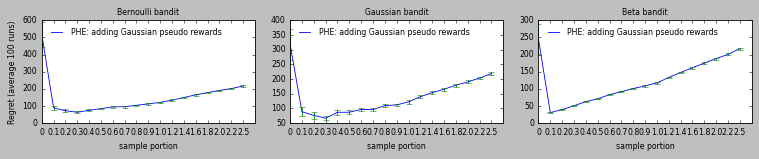

In [2]:
# Fine tuning of PHE

sample_portions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                   0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.5]
sample_portions_labels = [str(x) for x in sample_portions] 
init_var = 0.6

# sample_portions = [0, 0.1, 0.2, 0.5, 0.7, 1.0]
# sample_portions_labels = ['0', '0.1', '0.2', 
#                           '0.5', '0.7', '1.0'] 

x_axis = np.arange(len(sample_portions))
num_runs = 100
n = 10000
K = 10

plt.figure(figsize=(9.6, 2))
algs = ['PHE']
colors = {'PHE':'red'}

for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    elif fig == 1:
      env.append(GaussBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 3, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for sample_portion in sample_portions:
        regret, _ = evaluate_parallel(alg_class, 
                {"a": sample_portion}, env, n, num_process=13)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/np.sqrt(num_runs))

    plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), 
             label=alg+': adding Gaussian pseudo rewards')
    plt.errorbar(x_axis, regret_means, regret_vars, fmt="none")
    plt.xticks(x_axis, sample_portions_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  elif fig == 1:
    plt.title("Gaussian bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("sample portion")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))

  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("../exp_results/PHE_vs_SamplePortion_{}_{}_{}_{}.jpeg" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
    plt.savefig(f, format="jpeg", bbox_inches=0)
#   plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating TS.................................................................................................... 6.2 seconds
Regret: 176.87 +/- 28.41 (median: 23.50, max: 1353.00, min: -31.00)
Evaluating TS.................................................................................................... 5.7 seconds
Regret: 125.41 +/- 18.80 (median: 31.50, max: 853.00, min: -50.00)
Evaluating TS.................................................................................................... 5.5 seconds
Regret: 83.19 +/- 12.65 (median: 36.50, max: 796.00, min: -48.00)
Evaluating TS.................................................................................................... 5.6 seconds
Regret: 75.56 +/- 7.28 (median: 51.00, max: 384.00, min: -17.00)
Evaluating TS.................................................................................................... 5.5 seconds
Regret: 85.02 +/- 6.42 (median: 64.50, max: 508.00, min: 28.00)
Evaluating TS...........................

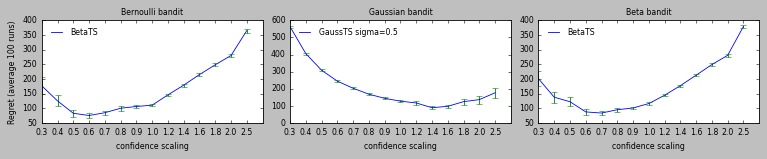

In [3]:
# Fine tuning of Thompson Sampling
import datetime

conf_scales = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 
               0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5]
conf_scales_labels = [str(x) for x in conf_scales] 

x_axis = np.arange(len(conf_scales))
num_runs = 100
n = 10000
K = 10

plt.figure(figsize=(9.6, 2))
algs = ['TS']
colors = {'Beta-TS':'red'}

for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    elif fig == 1:
      env.append(GaussBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 3, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    if fig == 1:
        alg = 'GaussTS'
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for conf_scale in conf_scales:
        regret, _ = evaluate_parallel(alg_class, 
                {"crs": conf_scale}, env, n, num_process=13)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/np.sqrt(num_runs))

    plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), 
             label='BetaTS' if fig != 1 else 'GaussTS sigma=0.5')
    plt.errorbar(x_axis, regret_means, regret_vars, fmt="none")
    plt.xticks(x_axis, conf_scales_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  elif fig == 1:
    plt.title("Gaussian bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("confidence scaling")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))

  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("../exp_results/TS_vs_confscale_{}_{}_{}_{}.jpeg" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
    plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
#   plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating HS-SampleWithReplacement.................................................................................................... 106.5 seconds
Regret: 126.66 +/- 3.97 (median: 126.00, max: 265.00, min: 3.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 98.5 seconds
Regret: 99.74 +/- 10.00 (median: 81.00, max: 799.00, min: -45.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 97.3 seconds
Regret: 79.48 +/- 5.43 (median: 71.00, max: 394.00, min: -23.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 94.2 seconds
Regret: 88.81 +/- 8.67 (median: 67.00, max: 589.00, min: -39.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 97.7 s

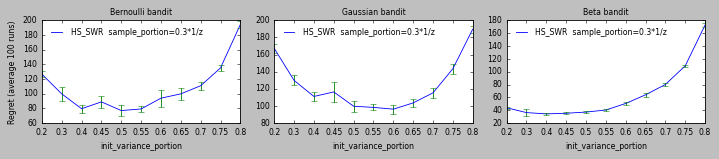

In [6]:
import datetime

init_vars = [0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, \
             0.65, 0.7, 0.75, 0.8]
init_var_labels = [str(x) for x in init_vars] 
sample_portion = 0.4

x_axis = np.arange(len(init_vars))
num_runs = 100
n = 10000
K = 10

plt.figure(figsize=(9, 2))
algs = ['HS_SWR']
colors = {'HS_SWR':'red'}

for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    elif fig == 1:
      env.append(GaussBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 3, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for init_var in init_vars:
        sample_portion = 1/init_var * 0.3
        regret, _ = evaluate_parallel(alg_class, 
            {"sample_portion": sample_portion, "z": init_var}, env, n, num_process=13)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/np.sqrt(num_runs))

    plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), 
             label=alg+'  sample_portion=0.3*1/z')
    plt.errorbar(x_axis, regret_means, regret_vars, fmt="none")
    plt.xticks(x_axis, init_var_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  elif fig == 1:
    plt.title("Gaussian bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("init_variance_portion")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))

  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("../exp_results/HS_SWR_asnoise_vs_initVar_{}_{}_{}_{}.jpeg" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
    plt.savefig(f, format="jpeg", bbox_inches=0)
plt.show()